# Backtester

In [44]:
import binance_helpers as bh
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import model as m
import ui
import importlib
importlib.reload(m)


<module 'model' from '/Users/SunnyNie/Documents/Investing/metagame/model.py'>

In [528]:
df = m.get_backtesting_df(progress=True, sleep=0.5)

 |██████████████████████████████████████████████████| 100.0% 


In [529]:
pct = (df - df.shift(1))/df.shift(1)
pct.drop("btc", inplace=True, axis=1)
pct.drop("busd", inplace=True, axis=1)
pct.dropna(how="all", inplace=True)
pct.tail(3)

,1inch,aave,ada,agld,aion,akro,alcx,algo,alice,alpha,...,key,klay,mask,mft,npxs,nu,ray,shib,twt,vtho
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-22 02:00:00,-0.005564,-0.012772,0.003950,-0.014033,0.001470,-0.006829,0.001541,-0.020217,-0.008274,-0.011697,...,-0.014080,-0.008141,-0.001694,-0.002605,NaN,-0.001913,-0.008973,-0.002246,-0.006966,0.017034
2022-01-22 03:00:00,-0.006452,-0.013473,-0.002690,-0.006011,-0.002758,-0.010491,-0.017576,-0.006435,-0.009135,-0.006772,...,-0.011722,0.009767,-0.011076,0.003286,NaN,-0.003435,-0.006071,-0.004187,-0.001531,-0.020752
2022-01-22 04:00:00,-0.002537,-0.001431,-0.001431,-0.006714,-0.003505,-0.002912,-0.008744,-0.002513,-0.002700,-0.004235,...,-0.008623,-0.000651,-0.010235,0.000092,NaN,-0.015634,-0.005738,-0.006841,-0.006774,-0.005545


In [530]:
pct_ = pct.resample("2H").sum().replace(0, np.nan)

In [531]:
pct_r = list(map(lambda x: pct_.iloc[x].sort_values(ascending=False).index, range(len(pct_))))

In [532]:
best = pct_r.copy()
best.insert(0, best[-1])
del best[-1]

In [533]:
def get_returns(pct, best, num=3):
    returns = []
    total = len(pct)
    for i in range(2, total):
        # if pct.iloc[i-1][best.iloc[i]]<0:
        #     returns.append(0)
        # else:
        row = pct.iloc[i]
        gain = sum(list(map(lambda x: row[best[i][x]], range(num))))/num
        if np.isnan(gain):
            gain = 0
        returns.append(-gain)
        ui.printProgressBar(i, total)
    return returns


In [534]:
returns = get_returns(pct_, best, num=1)

In [535]:
r = list(map(lambda x: x-0.004, returns))

In [536]:
len(r)

19427

<AxesSubplot:>

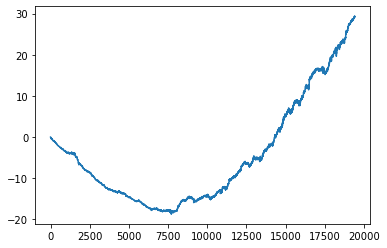

In [537]:
cumsum = pd.Series(r).cumsum()
cumsum.plot()

<AxesSubplot:>

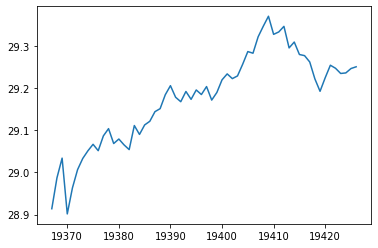

In [975]:
cumsum.iloc[-12*5:].plot()

In [544]:
t = 1
r_ = list(map(lambda x: x+1, r[-12*1:]))
for num in r_:
    t*=num


In [545]:
t

0.940150789016868

## Testing

In [758]:
from datetime import datetime, timedelta
client = bh.new_binance_client()

In [886]:
i = -100

In [970]:
i -= 1

In [971]:
s = pct_.iloc[i].name
e = s+timedelta(hours=2)
ss = (s-timedelta(hours=2)).strftime("%d %b %Y %H:%M:%S")
es = (e+timedelta(hours=2)).strftime("%d %b %Y %H:%M:%S")
name = best[i][0].upper()+"BTC"

In [972]:
print(f"{i}: Expected return for {name} on {ss}: {round(pct_.iloc[i][best[i][0]]*100, 2)}%")

-118: Expected return for OMGBTC on 12 Jan 2022 08:00:00: -2.06%


In [973]:
klines = client.get_historical_klines(symbol=name, interval = "1m", start_str=ss, end_str=es)

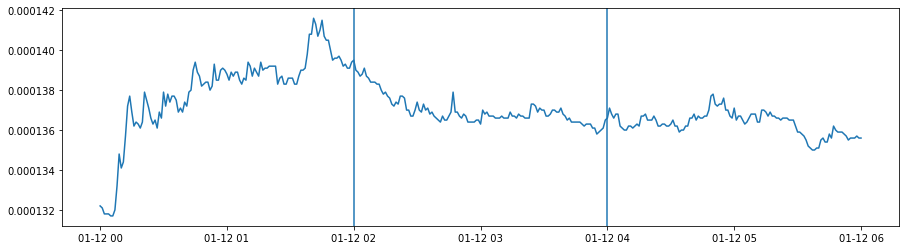

In [974]:
d = pd.DataFrame(list(map(lambda x: float(x[4]), klines)), 
                  index=list(map(lambda x: datetime.fromtimestamp(x[0] / 1e3), klines)), 
                  columns=['price'])
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(d.index, d.price)
ax.axvline(s-timedelta(hours=8))
ax.axvline(e-timedelta(hours=8))

### UTC hell

In [793]:
ss = (datetime.utcnow()-timedelta(hours=2)).strftime("%d %b %Y %H:%M:%S")
es = (datetime.utcnow()+timedelta(hours=2)).strftime("%d %b %Y %H:%M:%S")

In [794]:
klines = client.get_historical_klines(symbol=name, interval = "1m", start_str=ss, end_str=es)

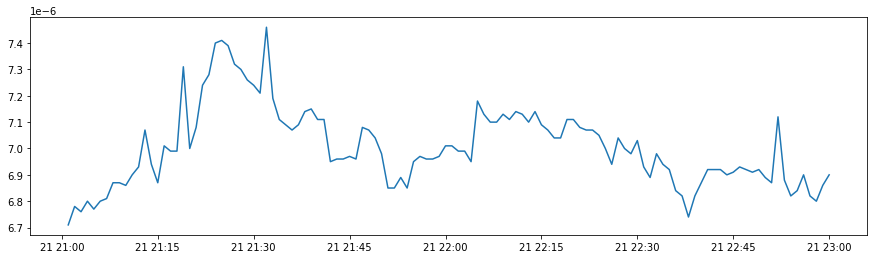

In [795]:
d = pd.DataFrame(list(map(lambda x: float(x[4]), klines)), 
                  index=list(map(lambda x: datetime.fromtimestamp(x[0] / 1e3), klines)), 
                  columns=['price'])
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(d.index, d.price)
# ax.axvline(s)
# ax.axvline(e)

## Forwardtesting

In [539]:
pct_r[-1]

Index(['req', 'mdt', 'jasmy', 'ong', 'forth', 'auction', 'wnxm', 'dusk',
       'front', 'ilv',
       ...
       'fis', 'nano', 'skl', 'srm', 'gala', 'nu', 'vgx', 'mkr', 'btt', 'npxs'],
      dtype='object', length=230)

In [550]:
pct_r[-2]

Index(['celr', 'rgt', 'rndr', 'wnxm', 'ong', 'firo', 'atom', 'vgx', 'klay',
       'ada',
       ...
       'near', 'perp', 'dusk', 'dydx', 'chr', 'auction', 'jasmy', 'icp', 'btt',
       'npxs'],
      dtype='object', length=230)

In [554]:
pct_.tail()

,1inch,aave,ada,agld,aion,akro,alcx,algo,alice,alpha,...,key,klay,mask,mft,npxs,nu,ray,shib,twt,vtho
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-21 20:00:00,-0.030973,-0.033229,-0.002109,-0.026499,-0.010390,-0.026142,-0.054583,-0.043896,-0.039669,-0.027491,...,-0.042721,0.004100,-0.043272,-0.012450,NaN,-0.002207,-0.013483,-0.053459,-0.022458,-0.051624
2022-01-21 22:00:00,0.055627,0.007091,-0.011940,-0.019799,0.006557,0.005810,-0.015917,-0.002485,-0.010796,0.000630,...,-0.007396,-0.004512,0.002828,-0.025476,NaN,-0.009293,0.021823,-0.009899,-0.000785,-0.007559
2022-01-22 00:00:00,-0.005339,0.017580,0.015851,0.001043,-0.003000,0.010683,0.031764,0.014104,0.010252,0.026991,...,0.008803,0.014765,0.012331,0.015930,NaN,0.015604,-0.002170,0.005259,0.009087,0.015018
2022-01-22 02:00:00,-0.012016,-0.026245,0.001260,-0.020043,-0.001287,-0.017320,-0.016035,-0.026651,-0.017408,-0.018469,...,-0.025801,0.001626,-0.012770,0.000680,NaN,-0.005348,-0.015044,-0.006433,-0.008497,-0.003718
2022-01-22 04:00:00,-0.002537,-0.001431,-0.001431,-0.006714,-0.003505,-0.002912,-0.008744,-0.002513,-0.002700,-0.004235,...,-0.008623,-0.000651,-0.010235,0.000092,NaN,-0.015634,-0.005738,-0.006841,-0.006774,-0.005545


In [80]:
btc = pd.read_csv("data/BTCUSDT.csv")

<AxesSubplot:>

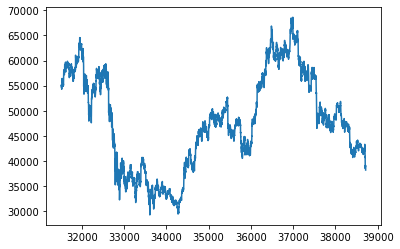

In [84]:
btc.iloc[-24*300:].close.plot()

In [73]:
best.iloc[-15:]

timestamp
2022-01-21 08:00:00     mdt
2022-01-21 09:00:00     dia
2022-01-21 10:00:00     mdt
2022-01-21 11:00:00    dydx
2022-01-21 12:00:00    kava
2022-01-21 13:00:00    dydx
2022-01-21 14:00:00    celr
2022-01-21 15:00:00    wnxm
2022-01-21 16:00:00    kava
2022-01-21 17:00:00    dydx
2022-01-21 18:00:00    rndr
2022-01-21 19:00:00    agld
2022-01-21 20:00:00     fun
2022-01-21 21:00:00     tvk
2022-01-21 22:00:00     clv
dtype: object

In [88]:
df.rndr

timestamp
2017-07-14 04:00:00         NaN
2017-07-14 05:00:00         NaN
2017-07-14 06:00:00         NaN
2017-07-14 07:00:00         NaN
2017-07-14 08:00:00         NaN
                         ...   
2022-01-21 15:00:00    0.000066
2022-01-21 16:00:00    0.000066
2022-01-21 17:00:00    0.000069
2022-01-21 18:00:00    0.000069
2022-01-21 19:00:00    0.000068
Name: rndr, Length: 41526, dtype: float64